In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
my_cols = ["A1", "A2", "A3", "A4", "A5","A6","A7","A8"]
data = pd.read_csv('SeismicResponse.txt',names=my_cols,delimiter='\t')

In [8]:
data

,A1,A2,A3,A4,A5,A6,A7,A8
0,-0.264298,-0.227624,0.364279,-0.096052,0.354945,0.181117,0.667918,0.604012
1,0.560000,0.093200,0.642000,0.069200,0.217000,-0.662000,-0.086200,-0.093000
2,-0.910000,-0.579000,-0.152000,-0.810000,0.365000,0.971000,-0.696000,0.316000
3,0.853000,-1.240000,-0.712000,0.791000,0.298000,0.764000,0.327000,-0.640000
4,0.750000,0.307000,0.677000,0.285000,-0.577000,0.775000,-1.100000,-1.020000
...,...,...,...,...,...,...,...,...
4995,0.211958,0.012930,0.639547,-0.540394,-0.725735,1.040096,-1.004970,-1.922219
4996,-0.526822,1.178716,-0.462624,-0.179855,0.588374,-0.089650,0.080514,0.600101
4997,0.348785,0.101456,-0.166348,0.090875,0.056185,-0.819480,-0.233470,0.889350
4998,-0.228205,-0.310206,0.065542,0.093991,0.755324,0.281063,-0.709294,-0.314332


False

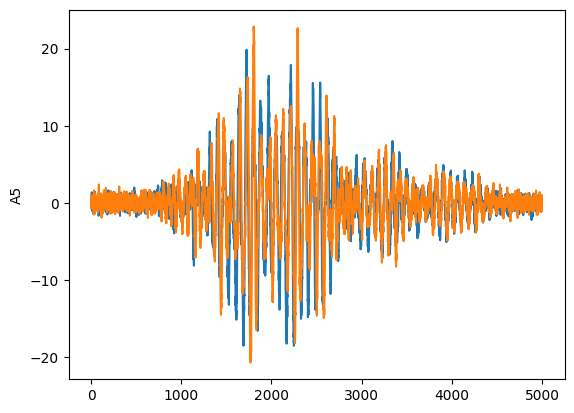

In [13]:
theta_B_plot = sns.lineplot(data = data['A5'])#theta_B
aBX_plot = sns.lineplot(data = data['A6'])#aBX
data.isnull().values.any() # check if any data is missing or is null

(a)

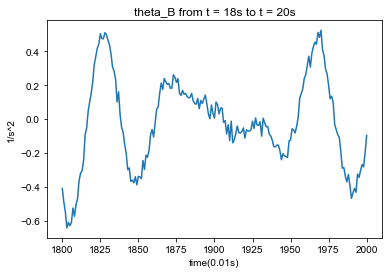

In [8]:
# theta_B = (a5-a6)/30
# aBX = a7-theta_B*7.5
# time = 18 to 20s = 1800 to 2000 column data
data["theta_B"] = (data['A5']-data['A6'])/30  # add column theta_B in dataframe
data["aBX"] = data['A7']-data['theta_B']*7.5  #add column aBX in dataframe
data_18_to_20s = data.loc[1800:2000]   # select data from 18 to 20 seconds
theta_B_plot = sns.lineplot(data = data_18_to_20s['theta_B'])
sns.set_style("darkgrid")
theta_B_plot.set_xlabel("time(0.01s)")
theta_B_plot.set_ylabel("1/s^2")
theta_B_plot.set_title("theta_B from t = 18s to t = 20s")
theta_B_plot.figure.savefig("theta_B from t = 18s to t = 20s.png")

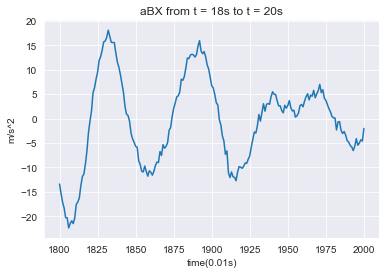

In [10]:
aBX_plot = sns.lineplot(data = data_18_to_20s['aBX'])
sns.set_style("darkgrid")
aBX_plot.set_xlabel("time(0.01s)")
aBX_plot.set_ylabel("m/s^2")
aBX_plot.set_title("aBX from t = 18s to t = 20s")
aBX_plot.figure.savefig("aBX from t = 18s to t = 20s.png")

(b)

In [11]:
# maximum absolute value of aBX
print('The maximum absolute value of aBX is', round(data['aBX'].abs().max(),2),'m/s^2')
# the second when max aBX happens
second = data['aBX'].abs() == data['aBX'].abs().max()
second = second.index[second==True].tolist()
second = second[0]*0.01
print('It occurs at',second,'seconds')

The maximum absolute value of aBX is 22.36 m/s^2
It occurs at 18.06 seconds


(c)

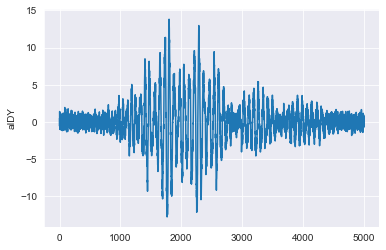

In [14]:
aIDY_plot = sns.lineplot(data = data['aIDY'])

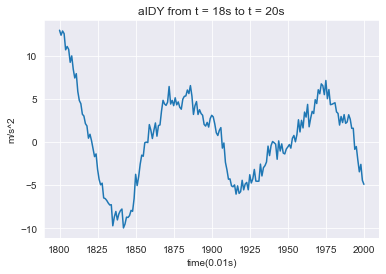

In [13]:
#Inter-story accceleration aIDY
#Define as aIDY = aBY −aAY = ((A5 + A6) - (A1 + A2))/2
data["aIDY"] = ((data['A5']+data['A6'])-(data['A1']+data['A2']))/2
data_18_to_20s = data.loc[1800:2000]
aIDY_plot = sns.lineplot(data = data_18_to_20s['aIDY'])
sns.set_style("darkgrid")
aIDY_plot.set_xlabel("time(0.01s)")
aIDY_plot.set_ylabel("m/s^2")
aIDY_plot.set_title("aIDY from t = 18s to t = 20s")
aIDY_plot.figure.savefig("aIDY from t = 18s to t = 20s.png")

In [15]:
print('The maximum absolute value of aIDY is', round(data['aIDY'].abs().max(),2),'m/s^2')

The maximum absolute value of aIDY is 13.81 m/s^2


(d)

In [47]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,theta_B,aBX,aIDY,int_sto_v,int_sto_drift
0,-0.264298,-0.227624,0.364279,-0.096052,0.354945,0.181117,0.667918,0.604012,0.005794,0.624461,0.513992,0.005140,0.000051
1,0.560000,0.093200,0.642000,0.069200,0.217000,-0.662000,-0.086200,-0.093000,0.029300,-0.305950,-0.549100,-0.000351,0.000048
2,-0.910000,-0.579000,-0.152000,-0.810000,0.365000,0.971000,-0.696000,0.316000,-0.020200,-0.544500,1.412500,0.013774,0.000186
3,0.853000,-1.240000,-0.712000,0.791000,0.298000,0.764000,0.327000,-0.640000,-0.015533,0.443500,0.724500,0.021019,0.000396
4,0.750000,0.307000,0.677000,0.285000,-0.577000,0.775000,-1.100000,-1.020000,-0.045067,-0.762000,-0.429500,0.016724,0.000563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.211958,0.012930,0.639547,-0.540394,-0.725735,1.040096,-1.004970,-1.922219,-0.058861,-0.563513,0.044736,-0.022076,0.591222
4996,-0.526822,1.178716,-0.462624,-0.179855,0.588374,-0.089650,0.080514,0.600101,0.022601,-0.088992,-0.076585,-0.022842,0.590994
4997,0.348785,0.101456,-0.166348,0.090875,0.056185,-0.819480,-0.233470,0.889350,0.029189,-0.452387,-0.606768,-0.028909,0.590705
4998,-0.228205,-0.310206,0.065542,0.093991,0.755324,0.281063,-0.709294,-0.314332,0.015809,-0.827859,0.787399,-0.021035,0.590495


Text(0.5, 1.0, 'inter-story velocity')

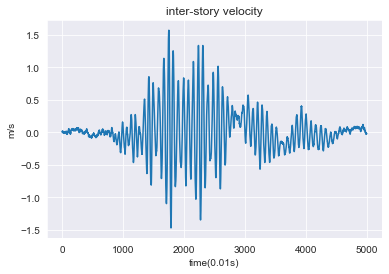

In [38]:
#inter_story velocity = integral of the inter-story acceleration
data['int_sto_v']= data['aIDY']*0.01
for i in range(1,5000):
    data['int_sto_v'][i] = data['int_sto_v'][i]+data['int_sto_v'][i-1]

int_sto_v_plot = sns.lineplot(data = data['int_sto_v'])
sns.set_style("darkgrid")
int_sto_v_plot.set_xlabel("time(0.01s)")
int_sto_v_plot.set_ylabel("m/s")
int_sto_v_plot.set_title("inter-story velocity")

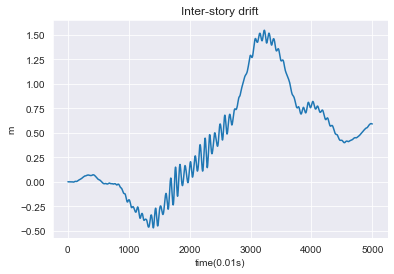

In [41]:
#inter_story drift = integral of the inter-story velocity
data['int_sto_drift']= data['int_sto_v']*0.01
for i in range(1,5000):
    data['int_sto_drift'][i] = data['int_sto_drift'][i]+data['int_sto_drift'][i-1]

int_sto_drift_plot = sns.lineplot(data = data['int_sto_drift'])
sns.set_style("darkgrid")
int_sto_drift_plot.set_xlabel("time(0.01s)")
int_sto_drift_plot.set_ylabel("m")
int_sto_drift_plot.set_title("Inter-story drift")
int_sto_drift_plot.figure.savefig("Inter-story drift.png")

In [48]:
print('The maximum absolute value of inter-story drift is', round(data['int_sto_drift'].abs().max(),2),'m')

The maximum absolute value of inter-story drift is 1.55 m


(e)

In [16]:
data_from_0_to_5s = data.loc[0:500]
data_A1_from_0_to_5s = data_from_0_to_5s ['A1'] # extract first five seconds data from A1
data_A2_from_0_to_5s = data_from_0_to_5s ['A2'] # extract first five seconds data from A2
data_A5_from_0_to_5s = data_from_0_to_5s ['A5'] # extract first five seconds data from A5
data_A6_from_0_to_5s = data_from_0_to_5s ['A6'] # extract first five seconds data from A6

print('The standard deviation of a1 noise is',round(data_A1_from_0_to_5s.std(),2)) #find and print the std of A1from 0 to 5 seconds
print('The standard deviation of a2 noise is',round(data_A2_from_0_to_5s.std(),2)) #find and print the std of A1from 0 to 5 seconds
print('The standard deviation of a5 noise is',round(data_A5_from_0_to_5s.std(),2)) #find and print the std of A1from 0 to 5 seconds
print('The standard deviation of a6 noise is',round(data_A6_from_0_to_5s.std(),2)) #find and print the std of A1from 0 to 5 seconds

The standard deviation of a1 noise is 0.61
The standard deviation of a2 noise is 0.59
The standard deviation of a5 noise is 0.63
The standard deviation of a6 noise is 0.64


(i)

In [26]:
my_cols = ["A1", "A2", "A3", "A4", "A5","A6","A7","A8"]
data_no_noise = pd.read_csv('SeismicResponse_noNoise.txt',names=my_cols,delimiter='\t')

In [27]:
# find the value of inter-story drift without noise    
data_no_noise["aIDY"] = ((data_no_noise['A5']+data_no_noise['A6'])-(data_no_noise['A1']+data_no_noise['A2']))/2
data_no_noise.head()
data_no_noise['int_sto_v']= data_no_noise['aIDY']*0.01
data_no_noise.head()
for i in range(1,5000):
    data_no_noise['int_sto_v'][i] = data_no_noise['int_sto_v'][i]+data_no_noise['int_sto_v'][i-1]

    
data_no_noise['int_sto_drift']= data_no_noise['int_sto_v']*0.01
for i in range(1,5000):
    data_no_noise['int_sto_drift'][i] = data_no_noise['int_sto_drift'][i]+data_no_noise['int_sto_drift'][i-1]

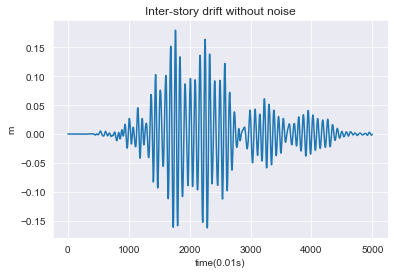

In [40]:
int_sto_drift_no_noise_plot = sns.lineplot(data = data_no_noise['int_sto_drift'])
sns.set_style("darkgrid")
int_sto_drift_no_noise_plot.set_xlabel("time(0.01s)")
int_sto_drift_no_noise_plot.set_ylabel("m")
int_sto_drift_no_noise_plot.set_title("Inter-story drift without noise")
int_sto_drift_no_noise_plot.figure.savefig("Inter-story drift without noise.png")

In [33]:
print('The maximum absolute value of inter-story drift without noise is', round(data_no_noise['int_sto_drift'].abs().max(),2),'m')

The maximum absolute value of inter-story drift without noise is 0.18 m
